In [4]:
using Distributions
using Random
using scBayesDeconv
using Plots

In [5]:
ndist = MixtureModel(
    MultivariateNormal[
        MultivariateNormal([0],ones(1,1)),
        MultivariateNormal([100],ones(1,1))
    ],
    [.5,.5]
    )

tdist = MixtureModel(
    MultivariateNormal[
        MultivariateNormal([0],ones(1,1))
    ],
    [1.]
    )

N = 1000

t = Matrix(transpose(rand(tdist,N)));
n = Matrix(transpose(rand(ndist,N)));
c = Matrix(transpose(rand(ndist,N)))+Matrix(transpose(rand(tdist,N)));
c = sort(c,dims=1);

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1342


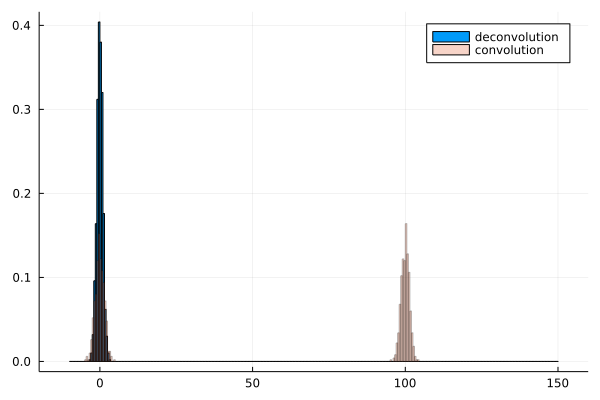

In [6]:
bins = range(-10,150,step=.5)
histogram(vec(t),normalize=true,bins=bins,label="deconvolution")
histogram!(vec(c),normalize=true,bins=bins,alpha=.3,label="convolution")

In [7]:
dn = infiniteGaussianMixture(n,k=2,Σ0 = ones(1,1),κ0=0.01);

In [75]:
dt = infiniteGaussianMixtureDeconvolution(c,dn,k=1,Σ0=ones(1,1),κ0=0.01,ν0=0.01,α=1);

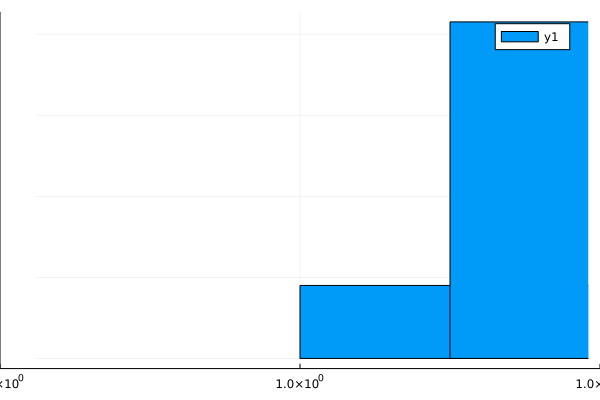

┌ Warning: No strict ticks found
└ @ PlotUtils /home/gabriel/.julia/packages/PlotUtils/NE7U1/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/gabriel/.julia/packages/PlotUtils/NE7U1/src/ticks.jl:191


In [76]:
histogram([(i.prior.p[1]) for i in dt.samples])

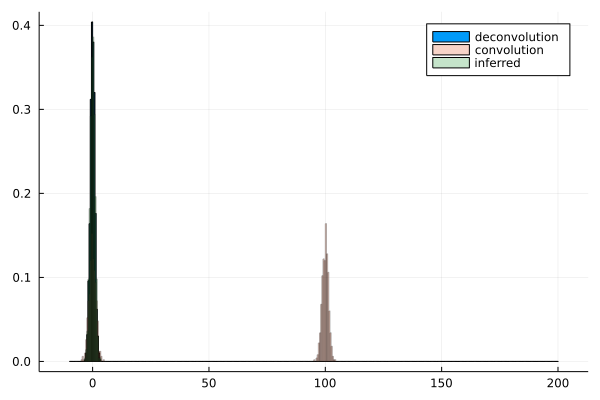

In [74]:
bins = range(-10,200,step=.5)
histogram(vec(t),normalize=true,bins=bins,label="deconvolution")
histogram!(vec(c),normalize=true,bins=bins,alpha=.3,label="convolution")

tt = rand(dt.samples[10],1000)
histogram!(vec(tt),normalize=true,bins=bins,alpha=.3,label="inferred")
